## This notebook contains codes for feature engineering and machine learning algorithms performed on the titanic dataset available on Kaggle.com

In [633]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [634]:
# importing data
data = pd.read_csv("train.csv")
df = pd.DataFrame(data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [635]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [636]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [637]:
total = df.isnull().sum().sort_values(ascending = False)
percent_1 =df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending = False)
missing_data = pd.concat([total, percent_2], axis = 1, keys = ['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [638]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [639]:
round(df.Embarked.value_counts()/len(df.Embarked)*100, 2)

Embarked
S    72.28
C    18.86
Q     8.64
Name: count, dtype: float64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

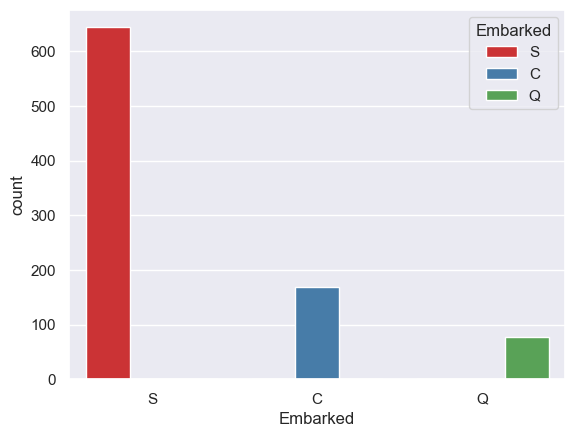

In [640]:
sns.set(style = "darkgrid")
sns.countplot(x = 'Embarked', data = df, hue = "Embarked", palette = 'Set1')

<AxesSubplot:xlabel='Survived', ylabel='count'>

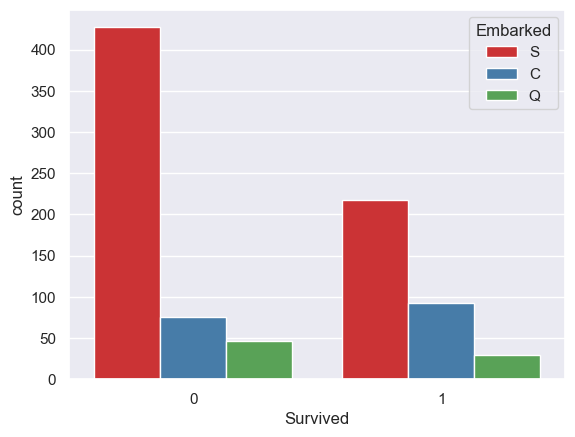

In [641]:
sns.set(style = "darkgrid")
sns.countplot(x = 'Survived', data = df, hue = 'Embarked', palette = 'Set1')

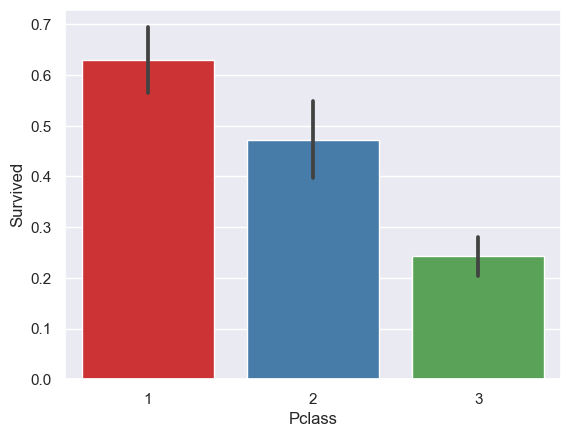

In [642]:
sns.barplot(x='Pclass', y='Survived', data=df, palette = 'Set1');

C:\Users\User\AppData\Local\Temp\ipykernel_11508\411321486.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'], ax = axes[0])
C:\Users\User\AppData\Local\Temp\ipykernel_11508\411321486.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], ax = axes[1])
C:\Users\User\AppData\L

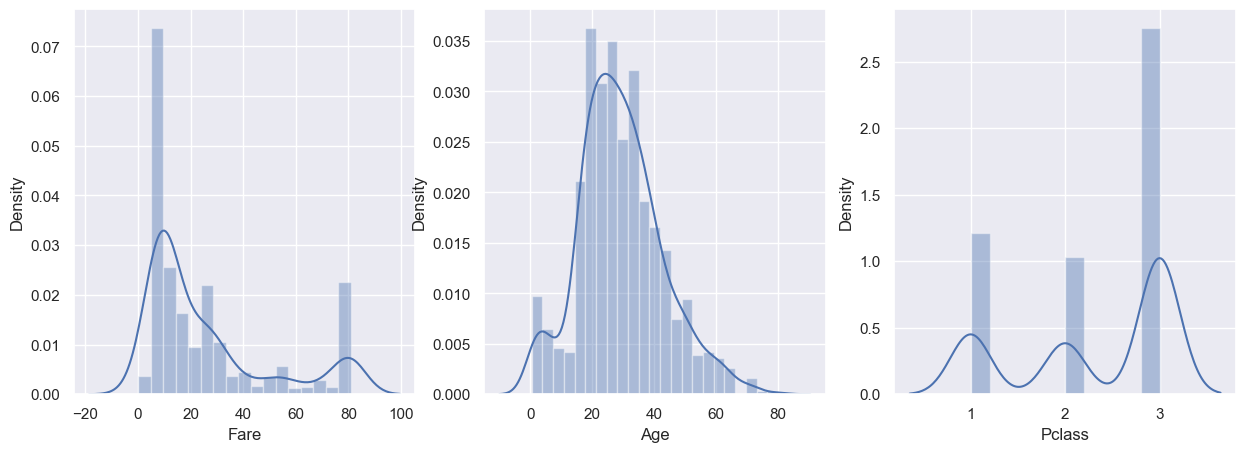

In [657]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
sns.distplot(df['Fare'], ax = axes[0])
sns.distplot(df['Age'], ax = axes[1])
sns.distplot(df['Pclass'], ax = axes[2])
plt.show();

In [643]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Preprocessing / Feature Engineering

In [644]:
# Extracting Deck from Cabin (Instinct : Alphabet in the cabin code might be the deck number)

def cabin(df):
    
    deck = {"A": "A", "B":"B", "C":"C", "D":"D", "E": "E", "F":"F", "G":"G", "U":"U"}

    df.Cabin = df.Cabin.fillna("U0")
    df['Deck'] = df.Cabin.map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    df['Deck'] = df.Deck.map(deck)
    new_deck = pd.get_dummies(df.Deck)
    df = df.join(new_deck, how = 'left', lsuffix='left', rsuffix='right')
    
    return df


df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
    
# Binning age
def age(df):
    mean = df.Age.mean()
    std = df.Age.std()
    total_null = df.Age.isnull().sum()

    #compute random numbers between the mean,std and total_null
    rand_age = np.random.randint(mean - std, mean + std, size = total_null)

    # Fill NaN values with the random values generated.
    df.Age[np.isnan(df.Age)] = rand_age
    
    # Binning Age
    df["Age_Range"] = pd.cut(df.Age, bins = [0,9,19,40,60,100], labels = ["Child", "Teenager", "Young", "Adults", "Aged"])
    df = df.join(pd.get_dummies(df.Age_Range))
        
    return df


# Name titles can make a new feature


def name(df):    
    
    titles = {"Mr": 1, "Miss" : 2, "Mrs": 3, "Master": 4, "Rare": 5}

    # extracting titles from name
    df['title'] = df.Name.str.extract('([A-Za-z]+)\.', expand = False)

    # replace titles with a more common title or as Rare
    df.title = df.title.replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df.title = df.title.replace('Mlle', 'Miss')
    df.title = df.title.replace('Ms', 'Miss')
    df.title = df.title.replace('Mme', 'Mrs')

    # Converting titles to numbers
    df.title = df.title.map(titles)
    
    return df


# Parch and SibSp can make a new feature
def relatives(df):
    df["relatives"] = (df.SibSp + df.Parch)
    df.loc[df.relatives > 0, 'travelled_alone'] = 'not_alone'
    df.loc[df.relatives == 0, 'travelled_alone'] = 'alone'
    
    new_travelled = pd.get_dummies(df.travelled_alone)
    df = df.join(new_travelled)

    return df


def embarked(df):
    df["Embarked"] = df.Embarked.fillna('S')
    new_embarked = pd.get_dummies(df.Embarked)
    df = df.join(new_embarked, how = 'left', lsuffix='left', rsuffix='right')
    
    return df


# Getting unwanted columns dropped
def drop_unwanted_columns(df):
    df.drop(columns = ['Age_Range', 'Deck', 'travelled_alone', 'Embarked', 'Cabin', 'Ticket', 'Name', 'PassengerId'], axis = 1, inplace = True)
    
    return df

In [645]:
# Data pipeline
df = df.pipe(cabin).pipe(age).pipe(name).pipe(relatives).pipe(embarked).pipe(drop_unwanted_columns)

C:\Users\User\AppData\Local\Temp\ipykernel_11508\3471813773.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age[np.isnan(df.Age)] = rand_age


In [646]:
df.head().T

,0,1,2,3,4
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Sex,0,1,1,1,0
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Fare,7.25,71.2833,7.925,53.1,8.05
A,False,False,False,False,False
B,False,False,False,False,False
Cleft,False,True,False,True,False


### Checking Outliers in Fair

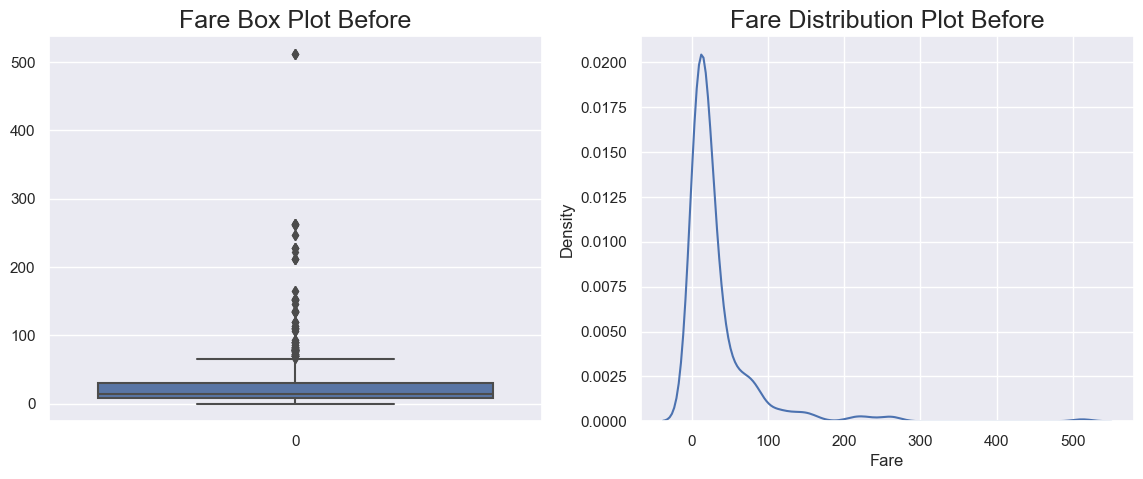

In [647]:
fig, axes = plt.subplots(1, 2, figsize = (14, 5))
sns.boxplot(df.Fare, ax = axes[0]).set_title('Fare Box Plot Before', fontsize = 18)

sns.kdeplot(df.Fare, ax = axes[1]).set_title('Fare Distribution Plot Before', fontsize = 18)
plt.show()

Here its clear that the data contains outlier and is not normalized. 
## Removing outliers by Interquartile Range

Inter-quartile range is used to measure variability by dividing a data set into quartiles.
The  data is sorted in ascending order and split into 4 equal parts.

Q1, Q2, Q3 called the first, second and third quartiles are the values that separate the 4 equal parts.

Q1 represents the 25th percentile of the data.
Q2 represents the 50th percentile of the data.
Q3 represents the 75th percentile of the data.

And if a dataset has 2n/2n+1 data points, then

Q1 = median of the dataset.
Q2 = median of n smallest data points.
Q3 = median of n highest data points.

IQR is the range between the first and the third quartiles namely Q1 and Q3:
IQR = Q3 - Q1
The data points which fall below Lower limit(Q1 - 1.5*IQR) or above Upper limit(Q3 + 1.5*IQR) are outliers.

In [648]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [649]:
Q1 = df.Fare.quantile(0.10)
Q3 = df.Fare.quantile(0.785)

IQR = Q3 - Q1


lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

df.loc[(df['Fare'] < lower_limit), 'Fare'] = lower_limit
df.loc[(df['Fare'] > upper_limit), 'Fare'] = upper_limit

In [650]:
df.Fare.describe()

count    891.000000
mean      25.749701
std       24.139102
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max       80.963075
Name: Fare, dtype: float64

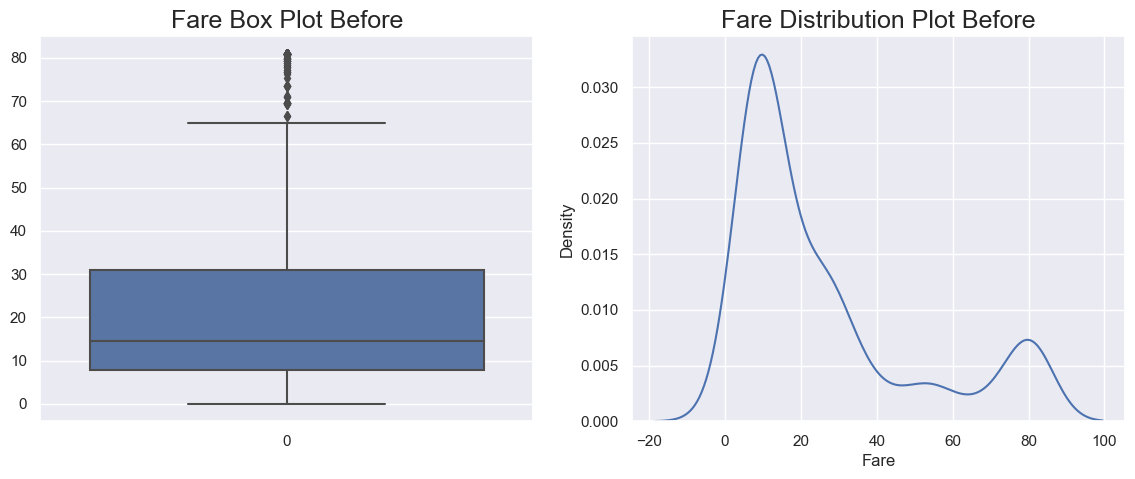

In [651]:
fig, axes = plt.subplots(1, 2, figsize = (14, 5))
sns.boxplot(df.Fare, ax = axes[0]).set_title('Fare Box Plot Before', fontsize = 18)

sns.kdeplot(df.Fare, ax = axes[1]).set_title('Fare Distribution Plot Before', fontsize = 18)
plt.show()

In [652]:
df.Fare.skew()

1.3203740459626863

<AxesSubplot:>

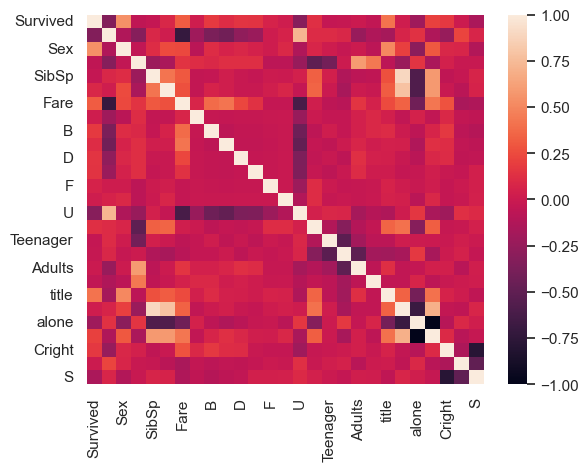

In [653]:
sns.heatmap(df.corr())

In [656]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
Survived,0,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
Pclass,3,1,3,1,3,3,1,3,3,2,...,3,3,2,3,3,2,1,3,1,3
Sex,0,1,1,1,0,0,0,0,1,1,...,0,1,0,0,1,0,1,1,0,0
Age,22.0,38.0,26.0,35.0,35.0,18.0,54.0,2.0,27.0,14.0,...,33.0,22.0,28.0,25.0,39.0,27.0,19.0,26.0,26.0,32.0
SibSp,1,1,0,1,0,0,0,3,0,1,...,0,0,0,0,0,0,0,1,0,0
Parch,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,5,0,0,2,0,0
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,...,7.8958,10.5167,10.5,7.05,29.125,13.0,30.0,23.45,30.0,7.75
A,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
B,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
Cleft,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
